# mAnDE: Experimentos 28/04/2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

pd.options.display.max_info_rows = 30000000

sns.set_style('darkgrid')

# Tamaño figuras
plt.rcParams["figure.figsize"] = (20,8)

pd.options.mode.chained_assignment = None

Vamos a quitar los algoritmos en los que hemos discretizado cuando no era necesario

In [2]:
df = pd.read_csv('results.csv').sort_values('bbdd', key=lambda col: col.str.lower())

#df = df[(df["algorithm"] != "Bagging_d") & (df["algorithm"] != "J48_d") & (df["algorithm"] != "RandomForest_d")]

df = df.reset_index(drop=True)
df

,bbdd,algorithm,seed,folds,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s)
0,2018_Financial_Data,mAnDE,2,3,1,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,2.969333
1,2018_Financial_Data,Bagging_d,11,3,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.339000
2,2018_Financial_Data,Bagging,7,3,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.823000
3,2018_Financial_Data,Bagging,5,3,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.827000
4,2018_Financial_Data,Bagging,3,3,0,False,False,False,0.0,99.977231,0.999732,0.999836,0.999629,0.832667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,Zoo,mAnDE,3,3,1,True,False,False,1.0,83.168317,0.612002,0.611917,0.689373,0.130667
11332,Zoo,mAnDE,3,3,1,True,False,True,10.0,92.079208,0.810442,0.901927,0.803571,0.112667
11333,Zoo,mAnDE,3,3,1,True,False,False,10.0,89.108911,0.776557,0.864229,0.792944,0.124333
11334,Zoo,mAnDE,3,3,1,True,False,True,100.0,94.059406,0.864136,0.877664,0.864286,0.113333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11336 entries, 0 to 11335
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bbdd       11336 non-null  object 
 1   algorithm  11336 non-null  object 
 2   seed       11336 non-null  int64  
 3   folds      11336 non-null  int64  
 4   n          11336 non-null  int64  
 5   ensemble   11336 non-null  bool   
 6   boosting   11336 non-null  bool   
 7   RF         11336 non-null  bool   
 8   bagSize    11336 non-null  float64
 9   score      11336 non-null  float64
 10  fm         11336 non-null  float64
 11  precision  11336 non-null  float64
 12  recall     11336 non-null  float64
 13  time(s)    11336 non-null  float64
dtypes: bool(3), float64(6), int64(3), object(2)
memory usage: 1007.5+ KB


También quitamos la columna "folds" porque hemos ejecutado todos con 3

In [4]:
df = df.drop(["folds", "seed"], axis=1)

Vemos como faltan muchas ejecuciones de A1DE y A2DE, porque dan excepción al quedarse sin memoria; de TAN (tarda una barbaridad de tiempo en muchos casos), y de mAnDE con 1 árbol y boosting, por fallo en la implementación que ya está resuelto

In [5]:
df.groupby(["algorithm", "n", "ensemble", "boosting", "RF", "bagSize"]).count()

,,,,,,bbdd,score,fm,precision,recall,time(s)
algorithm,n,ensemble,boosting,RF,bagSize,,,,,,
A1DE,0,False,False,False,0.0,397,397,397,397,397,397
A2DE,0,False,False,False,0.0,310,310,310,310,310,310
Bagging,0,False,False,False,0.0,444,444,444,444,444,444
Bagging_d,0,False,False,False,0.0,439,439,439,439,439,439
J48,0,False,False,False,0.0,444,444,444,444,444,444
J48_d,0,False,False,False,0.0,439,439,439,439,439,439
NB,0,False,False,False,0.0,444,444,444,444,444,444
RandomForest,0,False,False,False,0.0,444,444,444,444,444,444
RandomForest_d,0,False,False,False,0.0,434,434,434,434,434,434


In [6]:
df.groupby(["algorithm", "n", "ensemble", "boosting", "RF", "bagSize"]).mean()

,,,,,,score,fm,precision,recall,time(s)
algorithm,n,ensemble,boosting,RF,bagSize,,,,,
A1DE,0,False,False,False,0.0,83.423328,0.747634,0.756534,0.752368,7.443405
A2DE,0,False,False,False,0.0,83.227979,0.744094,0.756206,0.746731,18.822988
Bagging,0,False,False,False,0.0,83.788418,0.738019,0.765129,0.734857,14.175654
Bagging_d,0,False,False,False,0.0,84.117458,0.747841,0.775266,0.743876,6.085957
J48,0,False,False,False,0.0,82.462056,0.742095,0.750934,0.742731,7.456495
J48_d,0,False,False,False,0.0,83.380574,0.749177,0.763622,0.750325,1.543636
NB,0,False,False,False,0.0,74.123439,0.672278,0.700803,0.691290,0.871562
RandomForest,0,False,False,False,0.0,85.795457,0.766554,0.797410,0.760063,5.773674
RandomForest_d,0,False,False,False,0.0,87.097241,0.787848,0.812550,0.782408,1.769390


In [7]:
#pd.set_option('display.max_rows', 10000)
df.groupby(["bbdd", "algorithm", "n", "ensemble", "boosting", "RF", "bagSize"]).mean()

score  \
bbdd                algorithm n ensemble boosting RF    bagSize               
2018_Financial_Data A1DE      0 False    False    False 0.0       87.295082   
                    A2DE      0 False    False    False 0.0       87.326958   
                    Bagging   0 False    False    False 0.0       99.954463   
                    Bagging_d 0 False    False    False 0.0      100.000000   
                    J48       0 False    False    False 0.0       99.959016   
...                                                                     ...   
secom               mAnDE     2 True     False    False 100.0     92.814295   
                                                  True  1.0       93.363114   
                                                        10.0      93.235482   
                                                        100.0     92.239949   
                                         True     False 0.0       93.146139   

                                                                       fm  \
bbdd                algorithm n ensemble boosting RF    bagSize             
2018_Financial_Data A1DE      0 False    False    False 0.0      0.854589   
                    A2DE      0 False    False    False 0.0      0.849887   
                    Bagging   0 False    False    False 0.0      0.999464   
                    Bagging_d 0 False    False    False 0.0      1.000000   
                    J48       0 False    False    False 0.0      0.999518   
...                                                                   ...   
secom               mAnDE     2 True     False    False 100.0    0.505333   
                                                  True  1.0      0.484723   
                                                        10.0     0.515052   
                                                        100.0    0.547469   
                                         True     False 0.0      0.505308   

                                                                 precision  \
bbdd                algorithm n ensemble boosting RF    bagSize              
2018_Financial_Data A1DE      0 False    False    False 0.0       0.846637   
                    A2DE      0 False    False    False 0.0       0.852525   
                    Bagging   0 False    False    False 0.0       0.999672   
                    Bagging_d 0 False    False    False 0.0       1.000000   
                    J48       0 False    False    False 0.0       0.999705   
...                                                                    ...   
secom               mAnDE     2 True     False    False 100.0     0.559224   
                                                  True  1.0       0.516871   
                                                        10.0      0.645815   
                                                        100.0     0.600016   
                                         True     False 0.0       0.627315   

                                                                   recall  \
bbdd                algorithm n ensemble boosting RF    bagSize             
2018_Financial_Data A1DE      0 False    False    False 0.0      0.864991   
                    A2DE      0 False    False    False 0.0      0.847516   
                    Bagging   0 False    False    False 0.0      0.999257   
                    Bagging_d 0 False    False    False 0.0      1.000000   
                    J48       0 False    False    False 0.0      0.999331   
...                                                                   ...   
secom               mAnDE     2 True     False    False 100.0    0.511352   
                                                  True  1.0      0.500893   
                                                        10.0     0.516287   
                                                        100.0    0.536858   
                                         True     False 0.0      0.510449   

                       

## Vamos a ver para qué bases de datos A1DE y A2DE tienen nulos

In [8]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
df_unstack = df.drop(["fm", "precision", "recall", "time(s)"], axis=1)#"score"], axis=1)
df_unstack = df_unstack.groupby(["bbdd", "algorithm", "n", "ensemble", "boosting", "RF", "bagSize"]).mean().unstack(0)
df_unstack

score  \
bbdd                                             2018_Financial_Data   
algorithm      n ensemble boosting RF    bagSize                       
A1DE           0 False    False    False 0.0               87.295082   
A2DE           0 False    False    False 0.0               87.326958   
Bagging        0 False    False    False 0.0               99.954463   
Bagging_d      0 False    False    False 0.0              100.000000   
J48            0 False    False    False 0.0               99.959016   
J48_d          0 False    False    False 0.0              100.000000   
NB             0 False    False    False 0.0               39.776867   
RandomForest   0 False    False    False 0.0               92.112933   
RandomForest_d 0 False    False    False 0.0               86.830601   
TAN            0 False    False    False 0.0               90.760474   
mAnDE          1 False    False    False 0.0               99.945355   
                 True     False    False 1.0               72.222222   
                                         10.0              72.222222   
                                         100.0             72.222222   
                                   True  1.0               76.625683   
                                         10.0              82.959927   
                                         100.0             99.945355   
                          True     False 0.0               99.945355   
               2 False    False    False 0.0               86.179417   
                 True     False    False 1.0               72.222222   
                                         10.0              72.222222   
                                         100.0             72.222222   
                                   True  1.0               78.679417   
                                         10.0              80.974499   
                                         100.0             86.179417   
                          True     False 0.0               86.179417   

                                                                        \
bbdd                                                Abalone      Adult   
algorithm      n ensemble boosting RF    bagSize                         
A1DE           0 False    False    False 0.0      53.713191  85.287662   
A2DE           0 False    False    False 0.0      54.086665  85.998526   
Bagging        0 False    False    False 0.0      54.541537  85.131240   
Bagging_d      0 False    False    False 0.0      52.813024  86.119324   
J48            0 False    False    False 0.0      52.664592  85.988698   
J48_d          0 False    False    False 0.0      53.181709  86.543139   
NB             0 False    False    False 0.0      51.850610  83.258671   
RandomForest   0 False    False    False 0.0      54.215944  84.992015   
RandomForest_d 0 False    False    False 0.0      51.721331  85.689775   
TAN            0 False    False    False 0.0      52.817812  85.992384   
mAnDE          1 False    False    False 0.0      52.674168  85.460874   
                 True     False    False 1.0      52.602346  85.268826   
                                         10.0     52.564041  86.496458   
                                         100.0    52.554465  85.910077   
                                   True  1.0      52.573617  85.168093   
                                         10.0     52.607134  85.005938   
                                         100.0    52.607134  85.007575   
                          True     False 0.0      52.449126  84.953524   
               2 False    False    False 0.0      53.895140  84.888416   
                 True     False    False 1.0      53.253531  85.028050   
                                         10.0     53.583912  86.776954   
                                         100.0    53.727556  86.826092   
                                   True  1.0      53.722768  86.604971   
                                         10.0     

### A2DE

In [9]:
bbdds = df_unstack.dropna(axis=1, how='any').columns.get_level_values(1).values
bbdds

array(['2018_Financial_Data', 'Abalone', 'Adult', 'Annealing',
       'Audiology', 'Auto_Imports', 'Balance-Scale',
       'Breast_Cancer_(Wisconsin)', 'Car_Evaluation',
       'Census-Income_(KDD)', 'Connect-4_Opening', 'Contact-lenses',
       'Contraceptive_Metod_Choice', 'Credit_Screening', 'Dermatology',
       'German', 'Glass_Identification', 'Habermans_Survival',
       'Heart_Disease_(Cleverland)', 'Hepatitis', 'Horse_colic',
       'House_Votes_84', 'Hungarian', 'Hypothyroid(Garavan)',
       'Ionosphere', 'Iris_Classification', 'King-rook-vs-king-pawn',
       'LED', 'Labor_negotiations', 'Letter_Recognition',
       'Live_Disorders_(Bupa)', 'Lung_Cancer', 'Lymphography',
       'MAGIC_Gamma_Telescope', 'Mushrooms', 'New-Thyroid', 'Nursey',
       'Optical_Digits', 'Page_Blocks', 'Pen_Digits',
       'Pima_Indians_Diabetes', 'Postoperative_Patient', 'Primary_Tumor',
       'Promoter_Gene_Sequences', 'SPAM_E-mail', 'Segment',
       'Sick-euthyroid', 'Sonar_Classification',
 

In [10]:
df_A2DE = df[df.bbdd.isin(bbdds)]
df_A2DE

,bbdd,algorithm,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s)
0,2018_Financial_Data,mAnDE,1,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,2.969333
1,2018_Financial_Data,Bagging_d,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.339000
2,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.823000
3,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.827000
4,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.977231,0.999732,0.999836,0.999629,0.832667
...,...,...,...,...,...,...,...,...,...,...,...,...
11331,Zoo,mAnDE,1,True,False,False,1.0,83.168317,0.612002,0.611917,0.689373,0.130667
11332,Zoo,mAnDE,1,True,False,True,10.0,92.079208,0.810442,0.901927,0.803571,0.112667
11333,Zoo,mAnDE,1,True,False,False,10.0,89.108911,0.776557,0.864229,0.792944,0.124333
11334,Zoo,mAnDE,1,True,False,True,100.0,94.059406,0.864136,0.877664,0.864286,0.113333


In [11]:
df_A2DE_group = df_A2DE.groupby(["algorithm", "n", "ensemble", "boosting", "RF", "bagSize"]).mean()
df_A2DE_group

,,,,,,score,fm,precision,recall,time(s)
algorithm,n,ensemble,boosting,RF,bagSize,,,,,
A1DE,0,False,False,False,0.0,82.460074,0.733756,0.745629,0.737796,0.304872
A2DE,0,False,False,False,0.0,83.084385,0.740711,0.753509,0.742869,8.551037
Bagging,0,False,False,False,0.0,82.571414,0.725871,0.743424,0.724440,2.211741
Bagging_d,0,False,False,False,0.0,81.944580,0.716937,0.733444,0.716472,1.360899
J48,0,False,False,False,0.0,82.111672,0.734525,0.742176,0.735016,1.419136
J48_d,0,False,False,False,0.0,81.915585,0.728840,0.736327,0.730873,0.248779
NB,0,False,False,False,0.0,77.442559,0.677095,0.698505,0.691246,0.183884
RandomForest,0,False,False,False,0.0,85.126072,0.763418,0.785626,0.757618,2.874253
RandomForest_d,0,False,False,False,0.0,84.079556,0.751512,0.770720,0.748020,1.559123


In [12]:
df_A2DE['alg'] = df_A2DE['algorithm'] + '_' + df_A2DE['n'].astype(str) + '_' + df_A2DE['ensemble'].astype(str) + '_' + df_A2DE['boosting'].astype(str) + '_' + df_A2DE['RF'].astype(str) + '_' + df_A2DE['bagSize'].astype(str)

df_A2DE = df_A2DE.sort_values(by=['alg'])

df_A2DE['alg'] = df_A2DE['alg'].map({'A1DE_0_False_False_False_0.0':'A1DE',
                                     'A2DE_0_False_False_False_0.0':'A2DE',
                                     'Bagging_0_False_False_False_0.0':'Bagging',
                                     'J48_0_False_False_False_0.0':'J48',
                                     'NB_0_False_False_False_0.0':'NB',
                                     'RandomForest_0_False_False_False_0.0':'RF',
                                     'TAN_0_False_False_False_0.0':'TAN',
                                     'mAnDE_1_False_False_False_0.0':'mAnDE1',
                                     'mAnDE_1_True_False_False_1.0':'mAnDE1_b1',
                                     'mAnDE_1_True_False_False_10.0':'mAnDE1_b10',
                                     'mAnDE_1_True_False_False_100.0':'mAnDE1_b100',
                                     'mAnDE_1_True_False_True_1.0':'mAnDE1_b1_RF',
                                     'mAnDE_1_True_False_True_10.0':'mAnDE1_b10_RF',
                                     'mAnDE_1_True_False_True_100.0':'mAnDE1_b100_RF',
                                     'mAnDE_1_True_True_False_0.0':'mAnDE1_boost',
                                     'mAnDE_2_False_False_False_0.0':'mAnDE2',
                                     'mAnDE_2_True_False_False_1.0':'mAnDE2_b1',
                                     'mAnDE_2_True_False_False_10.0':'mAnDE2_b10',
                                     'mAnDE_2_True_False_False_100.0':'mAnDE2_b100',
                                     'mAnDE_2_True_False_True_1.0':'mAnDE2_b1_RF',
                                     'mAnDE_2_True_False_True_10.0':'mAnDE2_b10_RF',
                                     'mAnDE_2_True_False_True_100.0':'mAnDE2_b100_RF',
                                     'mAnDE_2_True_True_False_0.0':'mAnDE2_boost'})

cust_order = {'mAnDE1': 0,'mAnDE1_b1': 1,'mAnDE1_b10': 2,'mAnDE1_b100': 3,'mAnDE1_b1_RF': 4,'mAnDE1_b10_RF': 5,'mAnDE1_b100_RF': 6,'mAnDE1_boost': 7,
              'mAnDE2': 8,'mAnDE2_b1': 9,'mAnDE2_b10': 10,'mAnDE2_b100': 11,'mAnDE2_b1_RF': 12,'mAnDE2_b10_RF': 13,'mAnDE2_b100_RF': 14,'mAnDE2_boost': 15,
              'NB': 16,'A1DE': 17,'A2DE': 18,'TAN': 19,'J48': 20,'Bagging': 21,'RF': 22}


df_A2DE = df_A2DE.assign(key1=df_A2DE.alg.map(cust_order)).sort_values(['key1']).drop(['key1'], axis=1)
df_A2DE


,bbdd,algorithm,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s),alg
1926,Contact-lenses,mAnDE,1,False,False,False,0.0,87.500000,0.865993,0.833333,0.933333,0.085667,mAnDE1
2625,Dermatology,mAnDE,1,False,False,False,0.0,89.890710,0.878007,0.894585,0.872766,0.098667,mAnDE1
3505,Glass_Identification,mAnDE,1,False,False,False,0.0,65.420561,0.485599,0.548528,0.467331,0.113333,mAnDE1
1618,Census-Income_(KDD),mAnDE,1,False,False,False,0.0,94.714403,0.757226,0.776710,0.740749,7.011333,mAnDE1
207,Abalone,mAnDE,1,False,False,False,0.0,52.501796,0.511833,0.509691,0.528207,0.180000,mAnDE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,Dermatology,RandomForest_d,0,False,False,False,0.0,96.721311,0.961700,0.969122,0.956259,0.073333,NaN
6169,Lung_Cancer,RandomForest_d,0,False,False,False,0.0,75.000000,0.589744,0.712644,0.589372,0.041667,NaN
8459,Primary_Tumor,RandomForest_d,0,False,False,False,0.0,45.427729,0.206513,0.200173,0.218376,0.143667,NaN
2677,Dermatology,RandomForest_d,0,False,False,False,0.0,96.174863,0.955938,0.959564,0.952802,0.068333,NaN


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

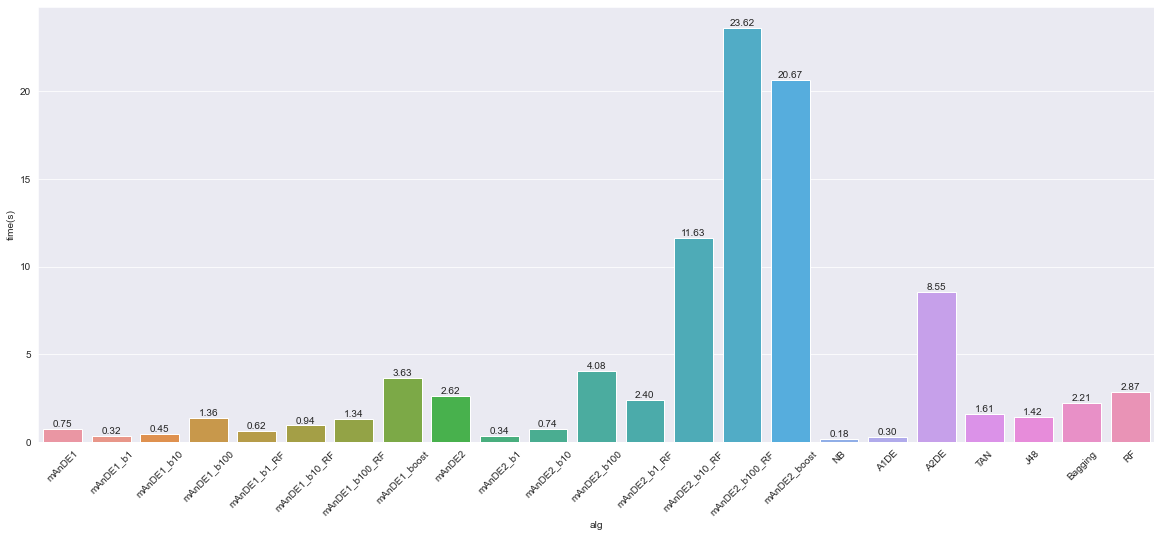

In [13]:
ax = sns.barplot(data=df_A2DE, x="alg", y='time(s)', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
sns.set_style("darkgrid")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

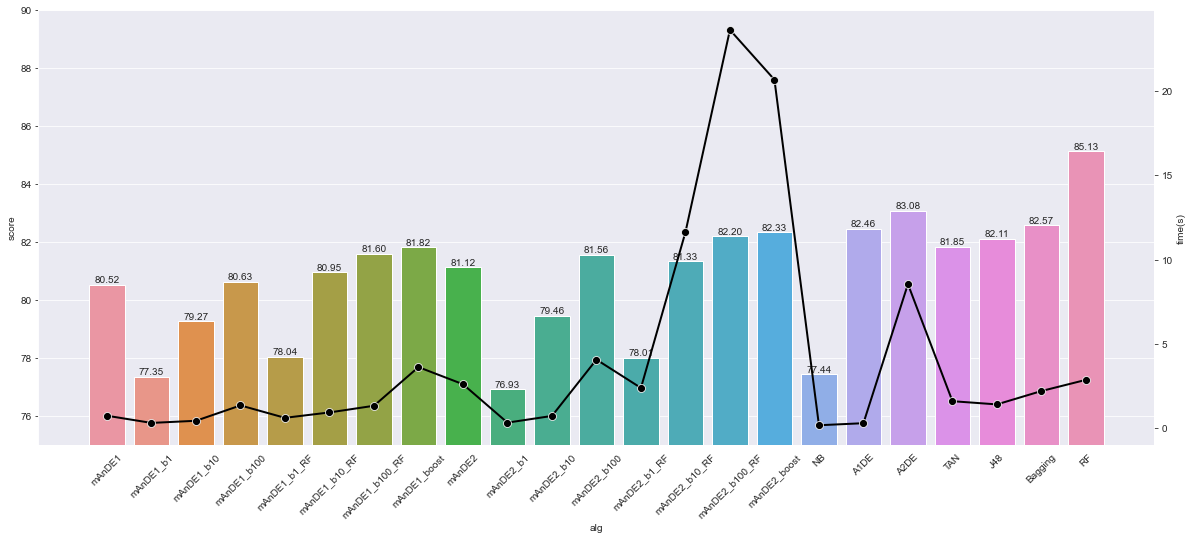

In [14]:
#start the plot at value 70 instead of 0
plt.ylim(75, 90)
sns.set_style("dark")
ax = sns.barplot(data=df_A2DE, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df_A2DE, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

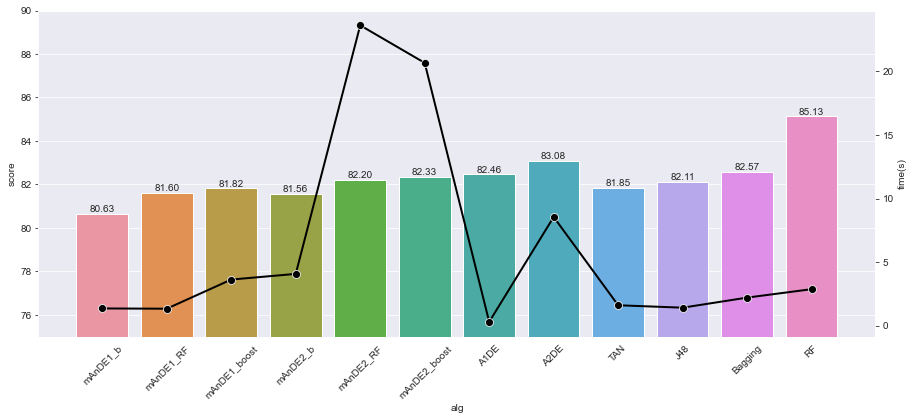

In [15]:
buenos = ['A1DE', 'A2DE', 'Bagging', 'J48', 'RF', 'TAN', 'mAnDE1_b100', 'mAnDE1_b100_RF', 'mAnDE1_boost', 'mAnDE2_b100', 'mAnDE2_b100_RF', 'mAnDE2_boost']
df_A2DE_buenos = df_A2DE[df_A2DE.alg.isin(buenos)]

df_A2DE_buenos['alg'] = df_A2DE_buenos['alg'].map({'mAnDE1_b100':'mAnDE1_b',
                                                   'mAnDE1_b100_RF':'mAnDE1_RF',
                                                   'mAnDE1_boost':'mAnDE1_boost',
                                                   'mAnDE2_b100':'mAnDE2_b',
                                                   'mAnDE2_b100_RF':'mAnDE2_RF',
                                                   'mAnDE2_boost':'mAnDE2_boost',
                                                   'A1DE':'A1DE',
                                                   'A2DE':'A2DE',
                                                   'Bagging':'Bagging',
                                                   'J48':'J48',
                                                   'RF':'RF',
                                                   'TAN':'TAN'})

plt.rcParams["figure.figsize"] = (15,6)

plt.ylim(75, 90)
sns.set_style("dark")
ax = sns.barplot(data=df_A2DE_buenos, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df_A2DE_buenos, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

### A1DE

In [16]:
plt.rcParams["figure.figsize"] = (20,8)

df = pd.read_csv('results.csv').sort_values('bbdd', key=lambda col: col.str.lower())

df = df.reset_index(drop=True)

df = df.drop(["folds", "seed"], axis=1)

Borramos las filas de A2DE

In [17]:
df2 = df.drop(df[df.algorithm == 'A2DE'].index)
df2

,bbdd,algorithm,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s)
0,2018_Financial_Data,mAnDE,1,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,2.969333
1,2018_Financial_Data,Bagging_d,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.339000
2,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.823000
3,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.827000
4,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.977231,0.999732,0.999836,0.999629,0.832667
...,...,...,...,...,...,...,...,...,...,...,...,...
11331,Zoo,mAnDE,1,True,False,False,1.0,83.168317,0.612002,0.611917,0.689373,0.130667
11332,Zoo,mAnDE,1,True,False,True,10.0,92.079208,0.810442,0.901927,0.803571,0.112667
11333,Zoo,mAnDE,1,True,False,False,10.0,89.108911,0.776557,0.864229,0.792944,0.124333
11334,Zoo,mAnDE,1,True,False,True,100.0,94.059406,0.864136,0.877664,0.864286,0.113333


In [18]:
df_unstack = df2.drop(["fm", "precision", "recall", "time(s)"], axis=1)
df_unstack = df_unstack.groupby(["bbdd", "algorithm", "n", "ensemble", "boosting", "RF", "bagSize"]).mean().unstack(0)
df_unstack

score  \
bbdd                                             2018_Financial_Data   
algorithm      n ensemble boosting RF    bagSize                       
A1DE           0 False    False    False 0.0               87.295082   
Bagging        0 False    False    False 0.0               99.954463   
Bagging_d      0 False    False    False 0.0              100.000000   
J48            0 False    False    False 0.0               99.959016   
J48_d          0 False    False    False 0.0              100.000000   
NB             0 False    False    False 0.0               39.776867   
RandomForest   0 False    False    False 0.0               92.112933   
RandomForest_d 0 False    False    False 0.0               86.830601   
TAN            0 False    False    False 0.0               90.760474   
mAnDE          1 False    False    False 0.0               99.945355   
                 True     False    False 1.0               72.222222   
                                         10.0              72.222222   
                                         100.0             72.222222   
                                   True  1.0               76.625683   
                                         10.0              82.959927   
                                         100.0             99.945355   
                          True     False 0.0               99.945355   
               2 False    False    False 0.0               86.179417   
                 True     False    False 1.0               72.222222   
                                         10.0              72.222222   
                                         100.0             72.222222   
                                   True  1.0               78.679417   
                                         10.0              80.974499   
                                         100.0             86.179417   
                          True     False 0.0               86.179417   

                                                                        \
bbdd                                                Abalone      Adult   
algorithm      n ensemble boosting RF    bagSize                         
A1DE           0 False    False    False 0.0      53.713191  85.287662   
Bagging        0 False    False    False 0.0      54.541537  85.131240   
Bagging_d      0 False    False    False 0.0      52.813024  86.119324   
J48            0 False    False    False 0.0      52.664592  85.988698   
J48_d          0 False    False    False 0.0      53.181709  86.543139   
NB             0 False    False    False 0.0      51.850610  83.258671   
RandomForest   0 False    False    False 0.0      54.215944  84.992015   
RandomForest_d 0 False    False    False 0.0      51.721331  85.689775   
TAN            0 False    False    False 0.0      52.817812  85.992384   
mAnDE          1 False    False    False 0.0      52.674168  85.460874   
                 True     False    False 1.0      52.602346  85.268826   
                                         10.0     52.564041  86.496458   
                                         100.0    52.554465  85.910077   
                                   True  1.0      52.573617  85.168093   
                                         10.0     52.607134  85.005938   
                                         100.0    52.607134  85.007575   
                          True     False 0.0      52.449126  84.953524   
               2 False    False    False 0.0      53.895140  84.888416   
                 True     False    False 1.0      53.253531  85.028050   
                                         10.0     53.583912  86.776954   
                                         100.0    53.727556  86.826092   
                                   True  1.0      53.722768  86.604971   
                                         10.0     53.708403  85.989927   
                                         100.0    53.713191  85.932190   
                          True     False 0.0    

Borramos las columnas con nulos (que serán nulos en A1DE)

In [19]:
bbdds = df_unstack.dropna(axis=1, how='any').columns.get_level_values(1).values
bbdds

array(['2018_Financial_Data', 'Abalone', 'Adult', 'Annealing',
       'Audiology', 'Auto_Imports', 'Balance-Scale',
       'Breast_Cancer_(Wisconsin)', 'CNS', 'Car_Evaluation',
       'Census-Income_(KDD)', 'Connect-4_Opening', 'Contact-lenses',
       'Contraceptive_Metod_Choice', 'Credit_Screening', 'Dermatology',
       'German', 'Glass_Identification', 'Habermans_Survival',
       'Heart_Disease_(Cleverland)', 'Hepatitis', 'Horse_colic',
       'House_Votes_84', 'Hungarian', 'Hypothyroid(Garavan)',
       'Ionosphere', 'Iris_Classification', 'King-rook-vs-king-pawn',
       'LED', 'Labor_negotiations', 'Letter_Recognition', 'Leukemia',
       'Leukemia_3c', 'Live_Disorders_(Bupa)', 'Lung_Cancer',
       'Lymphography', 'Lymphoma', 'MAGIC_Gamma_Telescope', 'Mushrooms',
       'New-Thyroid', 'Nursey', 'Optical_Digits', 'Page_Blocks',
       'Pen_Digits', 'Pima_Indians_Diabetes', 'Postoperative_Patient',
       'Primary_Tumor', 'Promoter_Gene_Sequences', 'SPAM_E-mail', 'SRBCT',
      

In [20]:
df_A1DE = df2[df2.bbdd.isin(bbdds)]
df_A1DE

,bbdd,algorithm,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s)
0,2018_Financial_Data,mAnDE,1,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,2.969333
1,2018_Financial_Data,Bagging_d,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.339000
2,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.823000
3,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.827000
4,2018_Financial_Data,Bagging,0,False,False,False,0.0,99.977231,0.999732,0.999836,0.999629,0.832667
...,...,...,...,...,...,...,...,...,...,...,...,...
11331,Zoo,mAnDE,1,True,False,False,1.0,83.168317,0.612002,0.611917,0.689373,0.130667
11332,Zoo,mAnDE,1,True,False,True,10.0,92.079208,0.810442,0.901927,0.803571,0.112667
11333,Zoo,mAnDE,1,True,False,False,10.0,89.108911,0.776557,0.864229,0.792944,0.124333
11334,Zoo,mAnDE,1,True,False,True,100.0,94.059406,0.864136,0.877664,0.864286,0.113333


In [21]:
df_A1DE_group = df_A1DE.groupby(["algorithm", "n", "ensemble", "boosting", "RF", "bagSize"]).mean()
df_A1DE_group

,,,,,,score,fm,precision,recall,time(s)
algorithm,n,ensemble,boosting,RF,bagSize,,,,,
A1DE,0,False,False,False,0.0,83.412290,0.746208,0.755655,0.750418,7.491773
Bagging,0,False,False,False,0.0,83.081674,0.725095,0.751382,0.722518,8.287616
Bagging_d,0,False,False,False,0.0,83.110506,0.729170,0.756672,0.726663,3.463827
J48,0,False,False,False,0.0,81.885061,0.729557,0.738794,0.730252,3.238047
J48_d,0,False,False,False,0.0,82.496428,0.732764,0.747927,0.734078,1.051672
NB,0,False,False,False,0.0,76.058013,0.680239,0.705501,0.697461,0.486475
RandomForest,0,False,False,False,0.0,85.285300,0.756753,0.787773,0.750465,2.858079
RandomForest_d,0,False,False,False,0.0,85.946032,0.769520,0.794240,0.764478,1.689645
TAN,0,False,False,False,0.0,83.093447,0.742034,0.754364,0.744322,267.589501


In [22]:
df_A1DE['alg'] = df_A1DE['algorithm'] + '_' + df_A1DE['n'].astype(str) + '_' + df_A1DE['ensemble'].astype(str) + '_' + df_A1DE['boosting'].astype(str) + '_' + df_A1DE['RF'].astype(str) + '_' + df_A1DE['bagSize'].astype(str)

df_A1DE = df_A1DE.sort_values(by=['alg'])

df_A1DE['alg'] = df_A1DE['alg'].map({'A1DE_0_False_False_False_0.0':'A1DE',
                                     'Bagging_0_False_False_False_0.0':'Bagging',
                                     'J48_0_False_False_False_0.0':'J48',
                                     'NB_0_False_False_False_0.0':'NB',
                                     'RandomForest_0_False_False_False_0.0':'RF',
                                     'TAN_0_False_False_False_0.0':'TAN',
                                     'mAnDE_1_False_False_False_0.0':'mAnDE1',
                                     'mAnDE_1_True_False_False_1.0':'mAnDE1_b1',
                                     'mAnDE_1_True_False_False_10.0':'mAnDE1_b10',
                                     'mAnDE_1_True_False_False_100.0':'mAnDE1_b100',
                                     'mAnDE_1_True_False_True_1.0':'mAnDE1_b1_RF',
                                     'mAnDE_1_True_False_True_10.0':'mAnDE1_b10_RF',
                                     'mAnDE_1_True_False_True_100.0':'mAnDE1_b100_RF',
                                     'mAnDE_1_True_True_False_0.0':'mAnDE1_boost',
                                     'mAnDE_2_False_False_False_0.0':'mAnDE2',
                                     'mAnDE_2_True_False_False_1.0':'mAnDE2_b1',
                                     'mAnDE_2_True_False_False_10.0':'mAnDE2_b10',
                                     'mAnDE_2_True_False_False_100.0':'mAnDE2_b100',
                                     'mAnDE_2_True_False_True_1.0':'mAnDE2_b1_RF',
                                     'mAnDE_2_True_False_True_10.0':'mAnDE2_b10_RF',
                                     'mAnDE_2_True_False_True_100.0':'mAnDE2_b100_RF',
                                     'mAnDE_2_True_True_False_0.0':'mAnDE2_boost'})

df_A1DE = df_A1DE.assign(key1=df_A1DE.alg.map(cust_order)).sort_values(['key1']).drop(['key1'], axis=1)
df_A1DE

,bbdd,algorithm,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s),alg
4362,Hypothyroid(Garavan),mAnDE,1,False,False,False,0.0,97.163309,0.648396,0.706833,0.616116,0.149000,mAnDE1
244,Abalone,mAnDE,1,False,False,False,0.0,52.956667,0.516582,0.512402,0.533993,0.180000,mAnDE1
1208,Breast_Cancer_(Wisconsin),mAnDE,1,False,False,False,0.0,95.708155,0.952868,0.949625,0.956436,0.104667,mAnDE1
2422,Credit_Screening,mAnDE,1,False,False,False,0.0,86.521739,0.861896,0.868961,0.858553,0.101333,mAnDE1
2425,csgo,mAnDE,1,False,False,False,0.0,72.891921,0.728898,0.728937,0.729025,21.767333,mAnDE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,Promoter_Gene_Sequences,RandomForest_d,0,False,False,False,0.0,32.075472,0.272860,0.320811,0.283633,0.051667,NaN
3465,Glass_Identification,RandomForest_d,0,False,False,False,0.0,73.364486,0.609017,0.633697,0.597001,0.057000,NaN
4246,Hungarian,RandomForest_d,0,False,False,False,0.0,79.931973,0.779074,0.784071,0.775191,0.069667,NaN
3466,Glass_Identification,RandomForest_d,0,False,False,False,0.0,77.570093,0.628697,0.655769,0.615207,0.058333,NaN


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

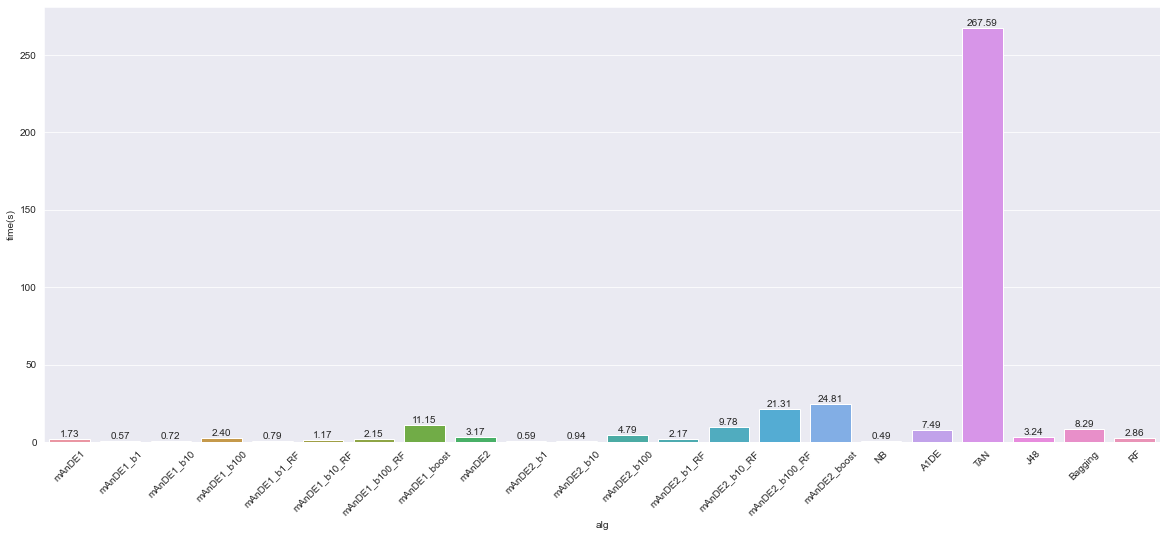

In [23]:
ax = sns.barplot(data=df_A1DE, x="alg", y='time(s)', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
sns.set_style("darkgrid")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

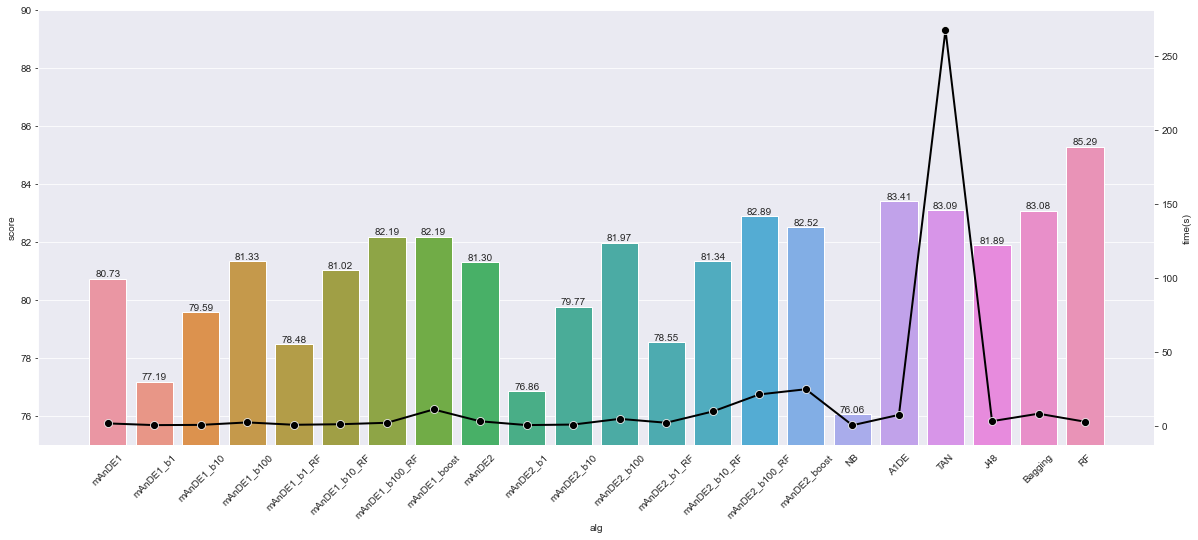

In [24]:
#start the plot at value 70 instead of 0
plt.ylim(75, 90)
sns.set_style("dark")
ax = sns.barplot(data=df_A1DE, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df_A1DE, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

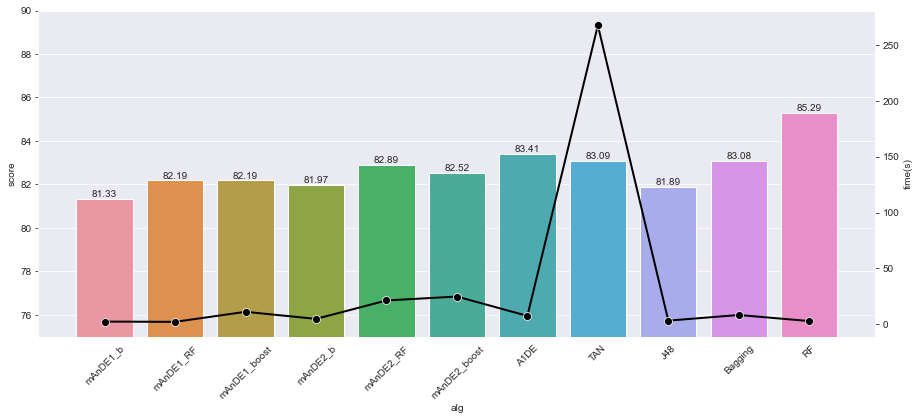

In [25]:
buenos = ['A1DE', 'Bagging', 'J48', 'RF', 'TAN', 'mAnDE1_b100', 'mAnDE1_b100_RF', 'mAnDE1_boost', 'mAnDE2_b100', 'mAnDE2_b100_RF', 'mAnDE2_boost']
df_A1DE_buenos = df_A1DE[df_A1DE.alg.isin(buenos)]

df_A1DE_buenos['alg'] = df_A1DE_buenos['alg'].map({'mAnDE1_b100':'mAnDE1_b',
                                                   'mAnDE1_b100_RF':'mAnDE1_RF',
                                                   'mAnDE1_boost':'mAnDE1_boost',
                                                   'mAnDE2_b100':'mAnDE2_b',
                                                   'mAnDE2_b100_RF':'mAnDE2_RF',
                                                   'mAnDE2_boost':'mAnDE2_boost',
                                                   'A1DE':'A1DE',
                                                   'Bagging':'Bagging',
                                                   'J48':'J48',
                                                   'RF':'RF',
                                                   'TAN':'TAN'})

plt.rcParams["figure.figsize"] = (15,6)

plt.ylim(75, 90)
sns.set_style("dark")
ax = sns.barplot(data=df_A1DE_buenos, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df_A1DE_buenos, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

## Sin A1DE ni A2DE (todas las bases de datos)

In [26]:
plt.rcParams["figure.figsize"] = (20,8)

df = pd.read_csv('results.csv').sort_values('bbdd', key=lambda col: col.str.lower())

df = df.reset_index(drop=True)

df = df.drop("folds", axis=1)

In [27]:
df2 = df.drop(df[(df.algorithm == 'A2DE') | (df.algorithm == 'A1DE') | (df.algorithm == 'TAN')].index)
df2

,bbdd,algorithm,seed,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s)
0,2018_Financial_Data,mAnDE,2,1,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,2.969333
1,2018_Financial_Data,Bagging_d,11,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.339000
2,2018_Financial_Data,Bagging,7,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.823000
3,2018_Financial_Data,Bagging,5,0,False,False,False,0.0,99.954463,0.999464,0.999672,0.999257,0.827000
4,2018_Financial_Data,Bagging,3,0,False,False,False,0.0,99.977231,0.999732,0.999836,0.999629,0.832667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11330,Zoo,mAnDE,3,1,True,False,True,1.0,83.168317,0.624105,0.652284,0.628571,0.122333
11331,Zoo,mAnDE,3,1,True,False,False,1.0,83.168317,0.612002,0.611917,0.689373,0.130667
11332,Zoo,mAnDE,3,1,True,False,True,10.0,92.079208,0.810442,0.901927,0.803571,0.112667
11333,Zoo,mAnDE,3,1,True,False,False,10.0,89.108911,0.776557,0.864229,0.792944,0.124333


In [28]:
df_group = df2.groupby(["algorithm", "n", "ensemble", "boosting", "RF", "bagSize"]).mean()
df_group

seed      score  \
algorithm      n ensemble boosting RF    bagSize                        
Bagging        0 False    False    False 0.0      5.587838  83.788418   
Bagging_d      0 False    False    False 0.0      5.587699  84.117458   
J48            0 False    False    False 0.0      5.587838  82.462056   
J48_d          0 False    False    False 0.0      5.587699  83.380574   
NB             0 False    False    False 0.0      5.587838  74.123439   
RandomForest   0 False    False    False 0.0      5.587838  85.795457   
RandomForest_d 0 False    False    False 0.0      5.587558  87.097241   
mAnDE          1 False    False    False 0.0      5.600000  81.341195   
                 True     False    False 1.0      5.595937  77.722951   
                                         10.0     5.600000  80.155635   
                                         100.0    5.600000  81.831527   
                                   True  1.0      5.587838  78.632678   
                                         10.0     5.600000  81.122052   
                                         100.0    5.600000  82.622143   
                          True     False 0.0      5.600000  82.780078   
               2 False    False    False 0.0      5.600000  81.919636   
                 True     False    False 1.0      5.587838  77.520697   
                                         10.0     5.587838  80.371851   
                                         100.0    5.587838  82.469448   
                                   True  1.0      5.587838  78.813302   
                                         10.0     5.587838  81.516321   
                                         100.0    5.587838  83.428092   
                          True     False 0.0      5.600000  83.185749   

                                                        fm  precision  \
algorithm      n ensemble boosting RF    bagSize                        
Bagging        0 False    False    False 0.0      0.738019   0.765129   
Bagging_d      0 False    False    False 0.0      0.747841   0.775266   
J48            0 False    False    False 0.0      0.742095   0.750934   
J48_d          0 False    False    False 0.0      0.749177   0.763622   
NB             0 False    False    False 0.0      0.672278   0.700803   
RandomForest   0 False    False    False 0.0      0.766554   0.797410   
RandomForest_d 0 False    False    False 0.0      0.787848   0.812550   
mAnDE          1 False    False    False 0.0      0.701898   0.739474   
                 True     False    False 1.0      0.665494   0.703429   
                                         10.0     0.693481   0.725062   
                                         100.0    0.715352   0.749517   
                                   True  1.0      0.653433   0.699933   
                                         10.0     0.703990   0.736700   
                                         100.0    0.727277   0.752188   
                          True     False 0.0      0.733841   0.760781   
               2 False    False    False 0.0      0.715007   0.751439   
                 True     False    False 1.0      0.664303   0.699347   
                                         10.0     0.698245   0.730284   
                                         100.0    0.722701   0.755518   
                                   True  1.0      0.657356   0.708149   
                                         10.0     0.700753   0.745504   
                                         100.0    0.730647   0.770931   
                          True     False 0.0      0.733083   0.766673   

                                                    recall    time(s)  
algorithm      n ensemble boosting RF    bagSize                       
Bagging        0 False    False    False 0.0      0.734857  14.175654  
Bagging_d      0 False    False    False 0.0      0.743876   6.085957  
J48            0 False    False    False 0.0      0.742731   7.456495  
J48_d          0 False    False    False 0

In [29]:
df2['alg'] = df2['algorithm'] + '_' + df2['n'].astype(str) + '_' + df2['ensemble'].astype(str) + '_' + df2['boosting'].astype(str) + '_' + df2['RF'].astype(str) + '_' + df2['bagSize'].astype(str)

df2 = df2.sort_values(by=['alg'])

df2['alg'] = df2['alg'].map({'Bagging_0_False_False_False_0.0':'Bagging',
                                     'J48_0_False_False_False_0.0':'J48',
                                     'NB_0_False_False_False_0.0':'NB',
                                     'RandomForest_0_False_False_False_0.0':'RF',
                                     'mAnDE_1_False_False_False_0.0':'mAnDE1',
                                     'mAnDE_1_True_False_False_1.0':'mAnDE1_b1',
                                     'mAnDE_1_True_False_False_10.0':'mAnDE1_b10',
                                     'mAnDE_1_True_False_False_100.0':'mAnDE1_b100',
                                     'mAnDE_1_True_False_True_1.0':'mAnDE1_b1_RF',
                                     'mAnDE_1_True_False_True_10.0':'mAnDE1_b10_RF',
                                     'mAnDE_1_True_False_True_100.0':'mAnDE1_b100_RF',
                                     'mAnDE_1_True_True_False_0.0':'mAnDE1_boost',
                                     'mAnDE_2_False_False_False_0.0':'mAnDE2',
                                     'mAnDE_2_True_False_False_1.0':'mAnDE2_b1',
                                     'mAnDE_2_True_False_False_10.0':'mAnDE2_b10',
                                     'mAnDE_2_True_False_False_100.0':'mAnDE2_b100',
                                     'mAnDE_2_True_False_True_1.0':'mAnDE2_b1_RF',
                                     'mAnDE_2_True_False_True_10.0':'mAnDE2_b10_RF',
                                     'mAnDE_2_True_False_True_100.0':'mAnDE2_b100_RF',
                                     'mAnDE_2_True_True_False_0.0':'mAnDE2_boost'})

df2 = df2.assign(key1=df2.alg.map(cust_order)).sort_values(['key1']).drop(['key1'], axis=1)
df2


,bbdd,algorithm,seed,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s),alg
2453,csgo,mAnDE,5,1,False,False,False,0.0,73.012009,0.730109,0.730195,0.730274,19.975333,mAnDE1
9716,Sonar_Classification,mAnDE,11,1,False,False,False,0.0,73.076923,0.727723,0.730715,0.726943,0.105667,mAnDE1
9842,SPAM_E-mail,mAnDE,7,1,False,False,False,0.0,89.915236,0.889790,0.917279,0.876761,0.302333,mAnDE1
9843,SPAM_E-mail,mAnDE,11,1,False,False,False,0.0,89.306672,0.882613,0.913555,0.868846,0.326333,mAnDE1
2055,Contraceptive_Metod_Choice,mAnDE,5,1,False,False,False,0.0,50.577054,0.483230,0.484893,0.486502,0.118000,mAnDE1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,secom,RandomForest_d,5,0,False,False,False,0.0,92.724952,0.567931,0.646464,0.550174,1.940667,NaN
2838,duke,RandomForest_d,7,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.203000,NaN
2890,duke,RandomForest_d,11,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.211667,NaN
5329,LED,RandomForest_d,5,0,False,False,False,0.0,70.000000,0.699901,0.700929,0.701908,0.083667,NaN


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

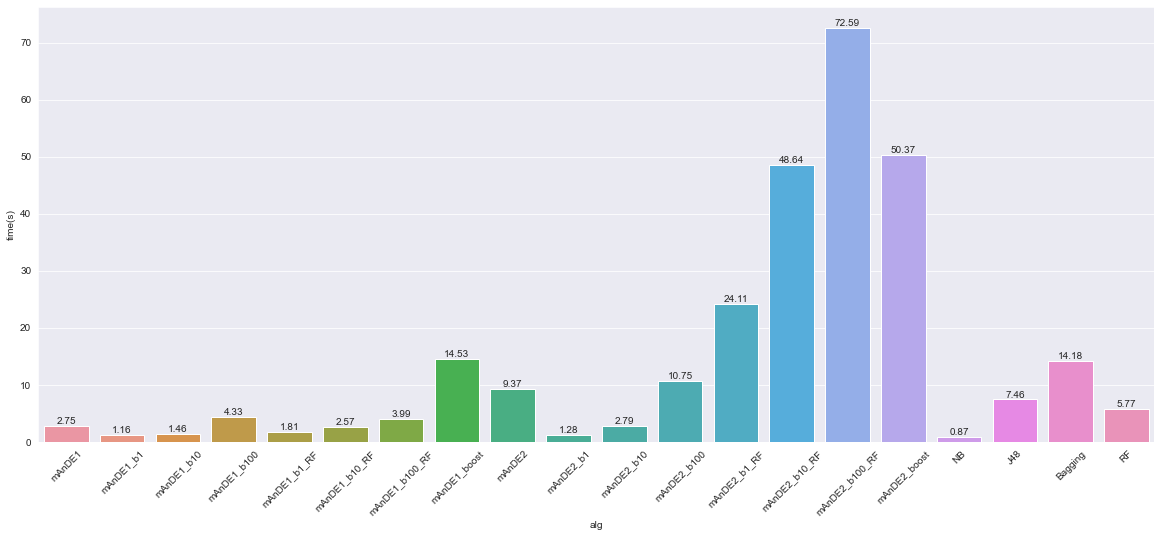

In [30]:
ax = sns.barplot(data=df2, x="alg", y='time(s)', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
sns.set_style("darkgrid")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

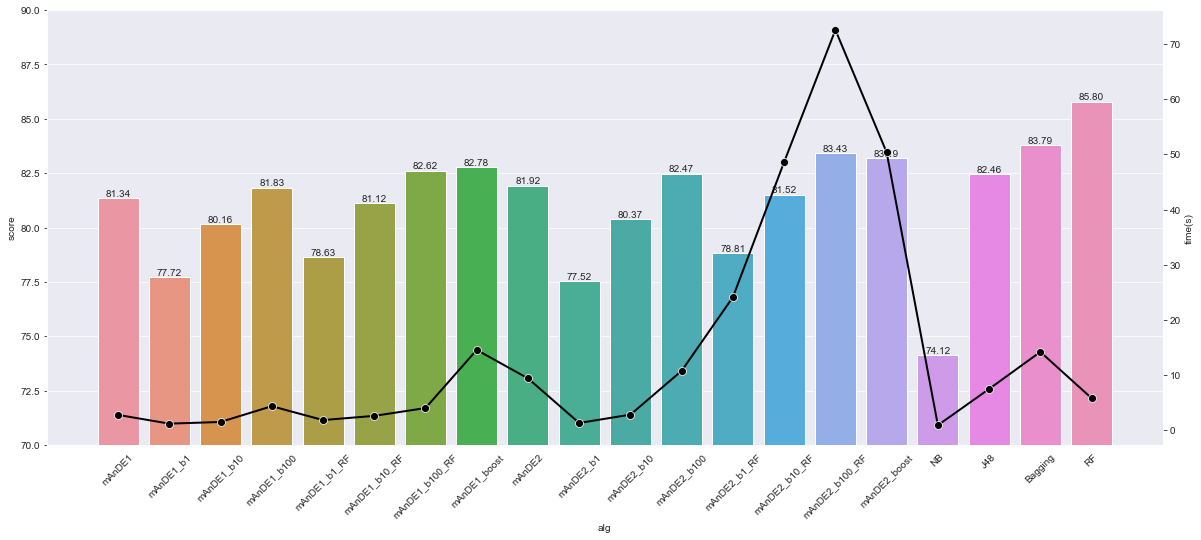

In [31]:
#start the plot at value 70 instead of 0
plt.ylim(70, 90)
sns.set_style("dark")
ax = sns.barplot(data=df2, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df2, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

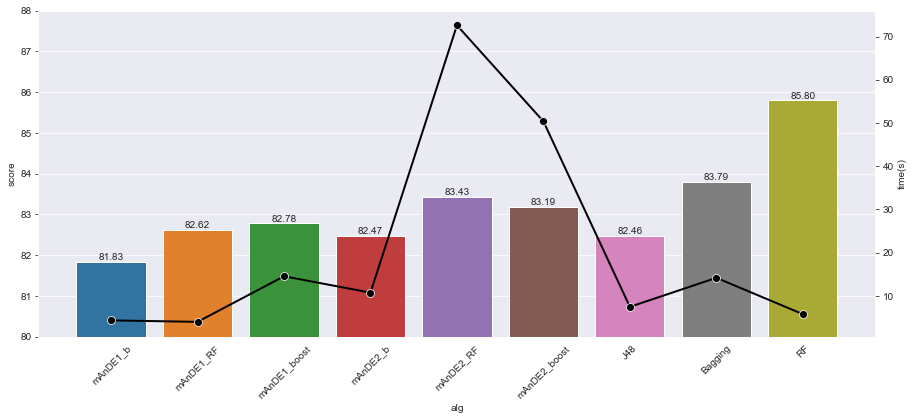

In [32]:
buenos = ['Bagging', 'J48', 'RF', 'TAN', 'mAnDE1_b100', 'mAnDE1_b100_RF', 'mAnDE1_boost', 'mAnDE2_b100', 'mAnDE2_b100_RF', 'mAnDE2_boost']
df2_buenos = df2[df2.alg.isin(buenos)]

df2_buenos['alg'] = df2_buenos['alg'].map({'mAnDE1_b100':'mAnDE1_b',
                                                   'mAnDE1_b100_RF':'mAnDE1_RF',
                                                   'mAnDE1_boost':'mAnDE1_boost',
                                                   'mAnDE2_b100':'mAnDE2_b',
                                                   'mAnDE2_b100_RF':'mAnDE2_RF',
                                                   'mAnDE2_boost':'mAnDE2_boost',
                                                   'Bagging':'Bagging',
                                                   'J48':'J48',
                                                   'RF':'RF',
                                                   'TAN':'TAN'})

plt.rcParams["figure.figsize"] = (15,6)

plt.ylim(80, 88)
sns.set_style("dark")
ax = sns.barplot(data=df2_buenos, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df2_buenos, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

## Bases de datos grandes (en número de variables)

Primero nos hace falta obtener los datos del tamaño de las bbdds

In [33]:
len(df2.bbdd.unique())

89

In [34]:
df3 = pd.read_csv('./Resumen.csv', sep=';')
#df3.set_index('Base', inplace=True)
#df3.index.name = "bbdd"
df3.rename(columns = {'Base':'bbdd'}, inplace = True)
df3

,bbdd,Inst,Var,Clase
0,2018_Financial_Data,4392,224,2
1,Abalone,4177,9,3
2,Adult,48842,15,2
3,Annealing,898,39,6
4,arrhythmia,452,280,16
...,...,...,...,...
85,Volcanoes,8753,4,5
86,Vowel,990,13,11
87,Waveform-5000,5000,41,3
88,Wine_Recognition,178,14,3


In [35]:
# Add "Inst", "Var" and "Clase" columns from df3 to df2 when "bbdd" is equal
df2 = df2.merge(df3, on='bbdd', how='left')
df2


,bbdd,algorithm,seed,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s),alg,Inst,Var,Clase
0,csgo,mAnDE,5,1,False,False,False,0.0,73.012009,0.730109,0.730195,0.730274,19.975333,mAnDE1,122410.0,97.0,2.0
1,Sonar_Classification,mAnDE,11,1,False,False,False,0.0,73.076923,0.727723,0.730715,0.726943,0.105667,mAnDE1,208.0,61.0,2.0
2,SPAM_E-mail,mAnDE,7,1,False,False,False,0.0,89.915236,0.889790,0.917279,0.876761,0.302333,mAnDE1,4601.0,58.0,2.0
3,SPAM_E-mail,mAnDE,11,1,False,False,False,0.0,89.306672,0.882613,0.913555,0.868846,0.326333,mAnDE1,4601.0,58.0,2.0
4,Contraceptive_Metod_Choice,mAnDE,5,1,False,False,False,0.0,50.577054,0.483230,0.484893,0.486502,0.118000,mAnDE1,1473.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,secom,RandomForest_d,5,0,False,False,False,0.0,92.724952,0.567931,0.646464,0.550174,1.940667,NaN,1567.0,591.0,2.0
10195,duke,RandomForest_d,7,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.203000,NaN,44.0,7130.0,2.0
10196,duke,RandomForest_d,11,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.211667,NaN,44.0,7130.0,2.0
10197,LED,RandomForest_d,5,0,False,False,False,0.0,70.000000,0.699901,0.700929,0.701908,0.083667,NaN,500.0,8.0,10.0


In [36]:
print(len(df2.bbdd.unique()))
print(len(df2[df2.Var > 100].bbdd.unique()))
print(len(df2[df2.Var > 500].bbdd.unique()))
print(len(df2[df2.Var > 1000].bbdd.unique()))
print(len(df2[df2.Var > 10000].bbdd.unique()))

89
29
26
20
7


### Var > 100

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

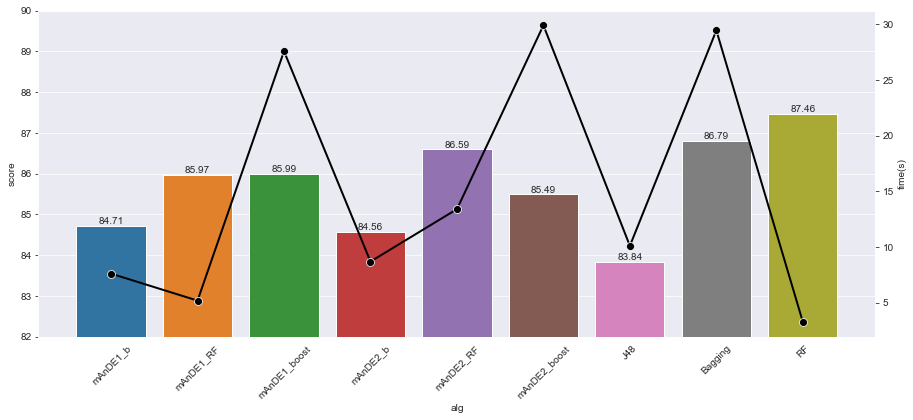

In [37]:
buenos = ['Bagging', 'J48', 'RF', 'TAN', 'mAnDE1_b100', 'mAnDE1_b100_RF', 'mAnDE1_boost', 'mAnDE2_b100', 'mAnDE2_b100_RF', 'mAnDE2_boost']

# Rows in wich Var is greather than 100
df2_buenos = df2[df2.alg.isin(buenos) & (df2.Var > 100)]

df2_buenos['alg'] = df2_buenos['alg'].map({'mAnDE1_b100':'mAnDE1_b',
                                                   'mAnDE1_b100_RF':'mAnDE1_RF',
                                                   'mAnDE1_boost':'mAnDE1_boost',
                                                   'mAnDE2_b100':'mAnDE2_b',
                                                   'mAnDE2_b100_RF':'mAnDE2_RF',
                                                   'mAnDE2_boost':'mAnDE2_boost',
                                                   'Bagging':'Bagging',
                                                   'J48':'J48',
                                                   'RF':'RF',
                                                   'TAN':'TAN'})

plt.rcParams["figure.figsize"] = (15,6)

plt.ylim(82, 90)
sns.set_style("dark")
ax = sns.barplot(data=df2_buenos, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df2_buenos, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

### Var > 500

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

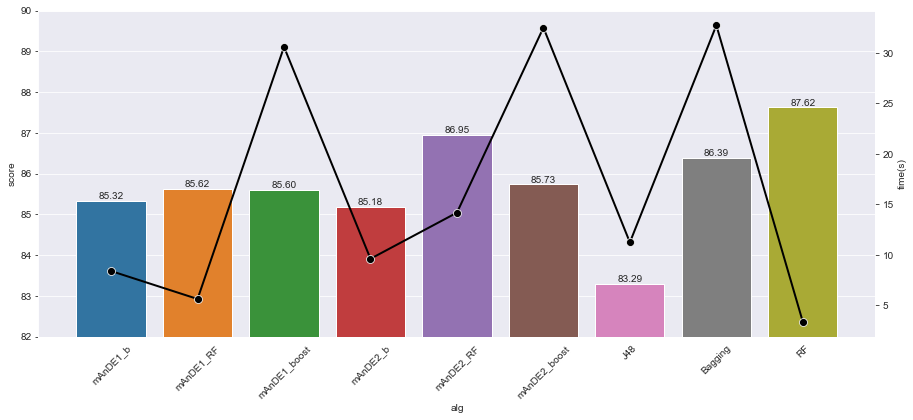

In [38]:
buenos = ['Bagging', 'J48', 'RF', 'TAN', 'mAnDE1_b100', 'mAnDE1_b100_RF', 'mAnDE1_boost', 'mAnDE2_b100', 'mAnDE2_b100_RF', 'mAnDE2_boost']

# Rows in wich Var is greather than 100
df2_buenos = df2[df2.alg.isin(buenos) & (df2.Var > 500)]

df2_buenos['alg'] = df2_buenos['alg'].map({'mAnDE1_b100':'mAnDE1_b',
                                                   'mAnDE1_b100_RF':'mAnDE1_RF',
                                                   'mAnDE1_boost':'mAnDE1_boost',
                                                   'mAnDE2_b100':'mAnDE2_b',
                                                   'mAnDE2_b100_RF':'mAnDE2_RF',
                                                   'mAnDE2_boost':'mAnDE2_boost',
                                                   'Bagging':'Bagging',
                                                   'J48':'J48',
                                                   'RF':'RF',
                                                   'TAN':'TAN'})

plt.rcParams["figure.figsize"] = (15,6)

plt.ylim(82, 90)
sns.set_style("dark")
ax = sns.barplot(data=df2_buenos, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df2_buenos, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

### Var > 1000

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

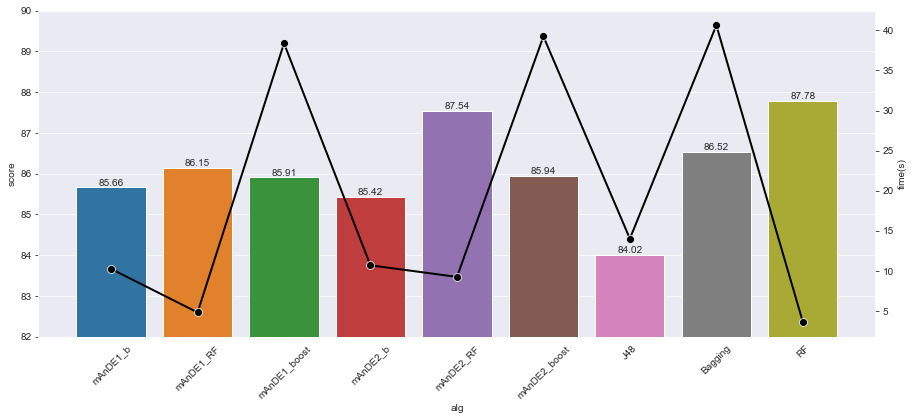

In [39]:
buenos = ['Bagging', 'J48', 'RF', 'TAN', 'mAnDE1_b100', 'mAnDE1_b100_RF', 'mAnDE1_boost', 'mAnDE2_b100', 'mAnDE2_b100_RF', 'mAnDE2_boost']

# Rows in wich Var is greather than 100
df2_buenos = df2[df2.alg.isin(buenos) & (df2.Var > 1000)]

df2_buenos['alg'] = df2_buenos['alg'].map({'mAnDE1_b100':'mAnDE1_b',
                                                   'mAnDE1_b100_RF':'mAnDE1_RF',
                                                   'mAnDE1_boost':'mAnDE1_boost',
                                                   'mAnDE2_b100':'mAnDE2_b',
                                                   'mAnDE2_b100_RF':'mAnDE2_RF',
                                                   'mAnDE2_boost':'mAnDE2_boost',
                                                   'Bagging':'Bagging',
                                                   'J48':'J48',
                                                   'RF':'RF',
                                                   'TAN':'TAN'})

plt.rcParams["figure.figsize"] = (15,6)

plt.ylim(82, 90)
sns.set_style("dark")
ax = sns.barplot(data=df2_buenos, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df2_buenos, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

### Var > 10000

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

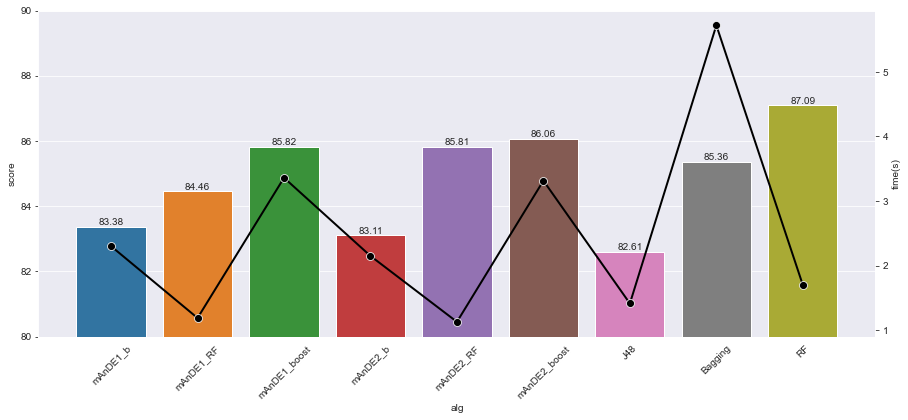

In [40]:
buenos = ['Bagging', 'J48', 'RF', 'TAN', 'mAnDE1_b100', 'mAnDE1_b100_RF', 'mAnDE1_boost', 'mAnDE2_b100', 'mAnDE2_b100_RF', 'mAnDE2_boost']

# Rows in wich Var is greather than 100
df2_buenos = df2[df2.alg.isin(buenos) & (df2.Var > 10000)]

df2_buenos['alg'] = df2_buenos['alg'].map({'mAnDE1_b100':'mAnDE1_b',
                                                   'mAnDE1_b100_RF':'mAnDE1_RF',
                                                   'mAnDE1_boost':'mAnDE1_boost',
                                                   'mAnDE2_b100':'mAnDE2_b',
                                                   'mAnDE2_b100_RF':'mAnDE2_RF',
                                                   'mAnDE2_boost':'mAnDE2_boost',
                                                   'Bagging':'Bagging',
                                                   'J48':'J48',
                                                   'RF':'RF',
                                                   'TAN':'TAN'})

plt.rcParams["figure.figsize"] = (15,6)

plt.ylim(80, 90)
sns.set_style("dark")
ax = sns.barplot(data=df2_buenos, x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df2_buenos, x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

## Bases de datos grandes (en número de instancias)

In [41]:
print(len(df2.bbdd.unique()))
print(len(df2[df2.Inst > 1000].bbdd.unique()))
print(len(df2[df2.Inst > 10000].bbdd.unique()))

89
36
12


### Inst > 1000

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

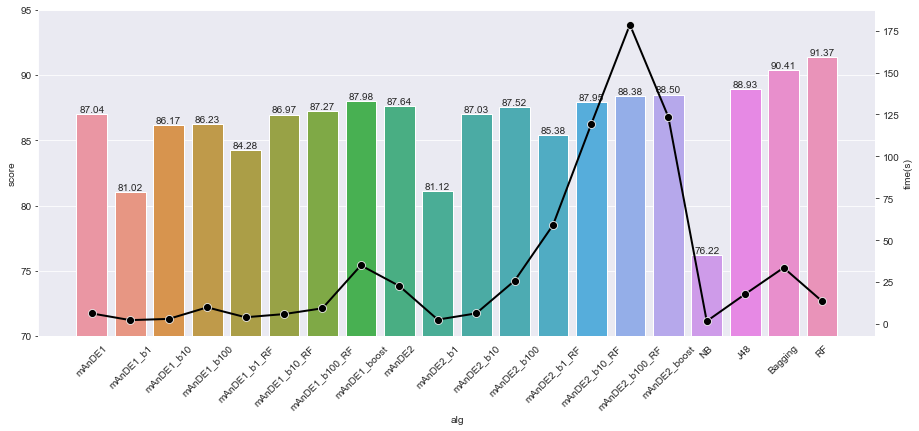

In [42]:
plt.ylim(70, 95)
sns.set_style("dark")
ax = sns.barplot(data=df2[df2.Inst > 1000], x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df2[df2.Inst > 1000], x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

### Inst > 10000

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

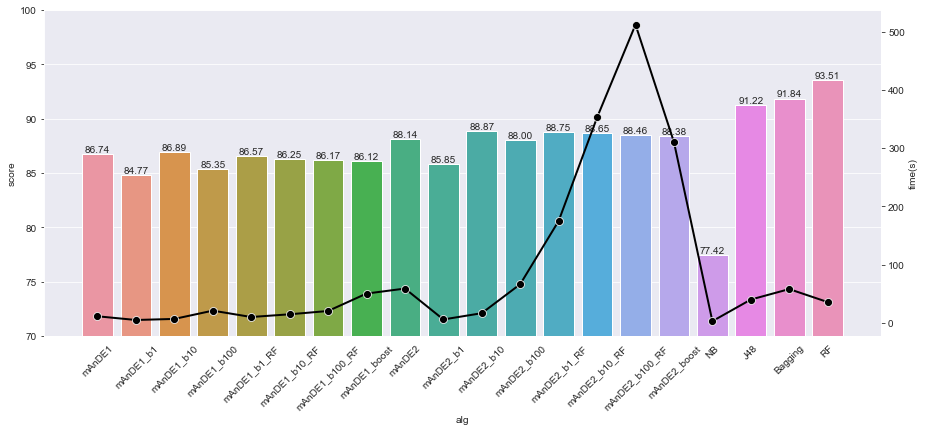

In [43]:
plt.ylim(70, 100)
sns.set_style("dark")
ax = sns.barplot(data=df2[df2.Inst > 10000], x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df2[df2.Inst > 10000], x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

In [44]:
df['alg'] = df['algorithm'] + '_' + df['n'].astype(str) + '_' + df['ensemble'].astype(str) + '_' + df['boosting'].astype(str) + '_' + df['RF'].astype(str) + '_' + df['bagSize'].astype(str)

df = df.sort_values(by=['alg'])

df['alg'] = df['alg'].map({'Bagging_0_False_False_False_0.0':'Bagging',
                                     'J48_0_False_False_False_0.0':'J48',
                                     'A1DE_0_False_False_False_0.0':'A1DE',
                                     'A2DE_0_False_False_False_0.0':'A2DE',
                                     'TAN_0_False_False_False_0.0':'TAN',
                                     'NB_0_False_False_False_0.0':'NB',
                                     'RandomForest_0_False_False_False_0.0':'RF',
                                     'mAnDE_1_False_False_False_0.0':'mAnDE1',
                                     'mAnDE_1_True_False_False_1.0':'mAnDE1_b1',
                                     'mAnDE_1_True_False_False_10.0':'mAnDE1_b10',
                                     'mAnDE_1_True_False_False_100.0':'mAnDE1_b100',
                                     'mAnDE_1_True_False_True_1.0':'mAnDE1_b1_RF',
                                     'mAnDE_1_True_False_True_10.0':'mAnDE1_b10_RF',
                                     'mAnDE_1_True_False_True_100.0':'mAnDE1_b100_RF',
                                     'mAnDE_1_True_True_False_0.0':'mAnDE1_boost',
                                     'mAnDE_2_False_False_False_0.0':'mAnDE2',
                                     'mAnDE_2_True_False_False_1.0':'mAnDE2_b1',
                                     'mAnDE_2_True_False_False_10.0':'mAnDE2_b10',
                                     'mAnDE_2_True_False_False_100.0':'mAnDE2_b100',
                                     'mAnDE_2_True_False_True_1.0':'mAnDE2_b1_RF',
                                     'mAnDE_2_True_False_True_10.0':'mAnDE2_b10_RF',
                                     'mAnDE_2_True_False_True_100.0':'mAnDE2_b100_RF',
                                     'mAnDE_2_True_True_False_0.0':'mAnDE2_boost'})

df = df.merge(df3, on='bbdd', how='left')

df = df.assign(key1=df.alg.map(cust_order)).sort_values(['key1']).drop(['key1'], axis=1)
df

,bbdd,algorithm,seed,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s),alg,Inst,Var,Clase
4225,Zoo,mAnDE,2,1,False,False,False,0.0,86.138614,0.611629,0.582212,0.646516,0.095667,mAnDE1,101.0,17.0,7.0
4528,arrhythmia,mAnDE,5,1,False,False,False,0.0,60.176991,0.149901,0.305573,0.134733,0.188000,mAnDE1,452.0,280.0,16.0
4527,CNS,mAnDE,3,1,False,False,False,0.0,53.333333,0.520000,0.528365,0.531136,0.238667,mAnDE1,60.0,7130.0,2.0
4526,Census-Income_(KDD),mAnDE,2,1,False,False,False,0.0,94.400989,0.759272,0.759475,0.759070,7.878000,mAnDE1,299285.0,41.0,2.0
4525,eggmental,mAnDE,11,1,False,False,False,0.0,92.416297,0.923317,0.924626,0.924126,1.150000,mAnDE1,2479.0,989.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,Lymphoma,RandomForest_d,5,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.256000,NaN,66.0,4027.0,3.0
3791,Lymphoma,RandomForest_d,7,0,False,False,False,0.0,96.969697,0.951241,0.986111,0.925926,0.249333,NaN,66.0,4027.0,3.0
3792,Lung,RandomForest_d,5,0,False,False,False,0.0,92.118227,0.774929,0.956671,0.725452,1.192000,NaN,203.0,12601.0,5.0
3793,Lung,RandomForest_d,3,0,False,False,False,0.0,92.610837,0.781557,0.957873,0.734976,1.148333,NaN,203.0,12601.0,5.0


#### Comparación con A1DE y A2DE

In [45]:
bbdds = df_unstack.dropna(axis=1, how='any').columns.get_level_values(1).values
df4 = df[df.bbdd.isin(bbdds)]
df4

,bbdd,algorithm,seed,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s),alg,Inst,Var,Clase
4225,Zoo,mAnDE,2,1,False,False,False,0.0,86.138614,0.611629,0.582212,0.646516,0.095667,mAnDE1,101.0,17.0,7.0
4528,arrhythmia,mAnDE,5,1,False,False,False,0.0,60.176991,0.149901,0.305573,0.134733,0.188000,mAnDE1,452.0,280.0,16.0
4527,CNS,mAnDE,3,1,False,False,False,0.0,53.333333,0.520000,0.528365,0.531136,0.238667,mAnDE1,60.0,7130.0,2.0
4526,Census-Income_(KDD),mAnDE,2,1,False,False,False,0.0,94.400989,0.759272,0.759475,0.759070,7.878000,mAnDE1,299285.0,41.0,2.0
4525,eggmental,mAnDE,11,1,False,False,False,0.0,92.416297,0.923317,0.924626,0.924126,1.150000,mAnDE1,2479.0,989.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,Lymphoma,RandomForest_d,3,0,False,False,False,0.0,98.484848,0.976808,0.992908,0.962963,0.259333,NaN,66.0,4027.0,3.0
3788,Vehicle,RandomForest_d,2,0,False,False,False,0.0,74.113475,0.734843,0.730316,0.743612,0.139333,NaN,846.0,19.0,4.0
3790,Lymphoma,RandomForest_d,5,0,False,False,False,0.0,100.000000,1.000000,1.000000,1.000000,0.256000,NaN,66.0,4027.0,3.0
3791,Lymphoma,RandomForest_d,7,0,False,False,False,0.0,96.969697,0.951241,0.986111,0.925926,0.249333,NaN,66.0,4027.0,3.0


In [46]:
df4[df4.Inst > 10000]

,bbdd,algorithm,seed,n,ensemble,boosting,RF,bagSize,score,fm,precision,recall,time(s),alg,Inst,Var,Clase
4526,Census-Income_(KDD),mAnDE,2,1,False,False,False,0.0,94.400989,0.759272,0.759475,0.759070,7.878000,mAnDE1,299285.0,41.0,2.0
4524,Census-Income_(KDD),mAnDE,11,1,False,False,False,0.0,94.714403,0.757226,0.776710,0.740749,7.011333,mAnDE1,299285.0,41.0,2.0
4521,csgo,mAnDE,3,1,False,False,False,0.0,72.985867,0.729836,0.729872,0.729960,21.342333,mAnDE1,122410.0,97.0,2.0
4509,csgo,mAnDE,5,1,False,False,False,0.0,73.012009,0.730109,0.730195,0.730274,19.975333,mAnDE1,122410.0,97.0,2.0
4506,csgo,mAnDE,11,1,False,False,False,0.0,72.967895,0.729646,0.729658,0.729745,22.068667,mAnDE1,122410.0,97.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715,Census-Income_(KDD),RandomForest_d,5,0,False,False,False,0.0,95.132733,0.725553,0.837384,0.673926,36.782667,NaN,299285.0,41.0,2.0
3717,Census-Income_(KDD),RandomForest_d,7,0,False,False,False,0.0,95.129058,0.726234,0.836060,0.674962,33.770667,NaN,299285.0,41.0,2.0
3761,Connect-4_Opening,RandomForest_d,7,0,False,False,False,0.0,81.704339,0.599401,0.737827,0.583343,11.459333,NaN,67557.0,43.0,3.0
3765,Connect-4_Opening,RandomForest_d,11,0,False,False,False,0.0,81.895288,0.600121,0.750274,0.584700,11.693000,NaN,67557.0,43.0,3.0


In [47]:
print(len(df4.bbdd.unique()))
print(len(df4[df4.Inst > 1000].bbdd.unique()))
print(len(df4[df4.Inst > 10000].bbdd.unique()))

78
33
9


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

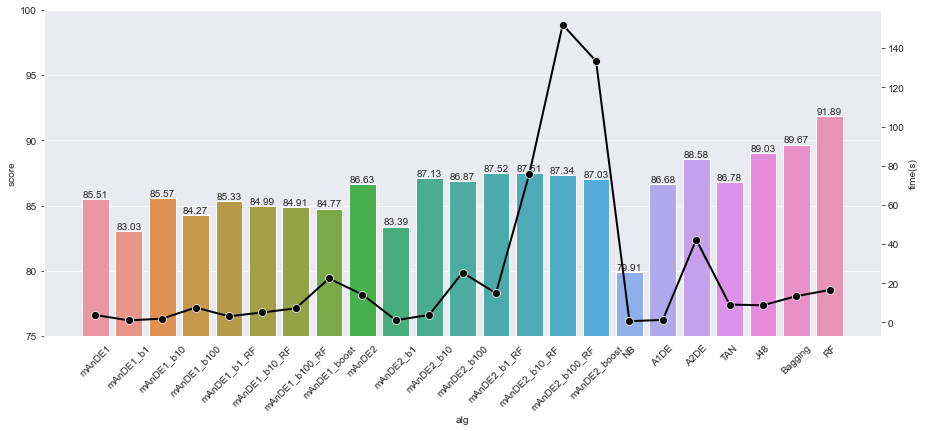

In [48]:
plt.ylim(75, 100)
sns.set_style("dark")
ax = sns.barplot(data=df4[df4.Inst > 10000], x="alg", y='score', ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)
ax2 = plt.twinx()
sns.set_style("darkgrid")
sns.lineplot(data=df4[df4.Inst > 10000], x="alg", y='time(s)', ax=ax2, ci=None, color='black', linewidth=2, legend=False, label='Time', marker='o', markersize=8)
plt.plot

## Mejor mAnDE

In [49]:
df46 = df.groupby(["algorithm", "n", "ensemble", "boosting", "RF", "bagSize", "bbdd"]).mean()
df46 = df46.groupby(["algorithm","n","bbdd"]).max()
df46 = df46.groupby(["algorithm","n"]).mean()
df46

,,seed,score,fm,precision,recall,time(s),Inst,Var,Clase
algorithm,n,,,,,,,,,
A1DE,0,5.592292,83.446121,0.746880,0.755755,0.751567,7.618893,16628.291139,806.189873,4.936709
A2DE,0,5.600000,83.227979,0.744094,0.756206,0.746731,18.822988,20983.704918,29.983607,4.704918
Bagging,0,5.584831,83.821202,0.738569,0.765623,0.735408,14.189710,15492.227273,2450.568182,4.784091
Bagging_d,0,5.584659,84.145397,0.748322,0.775694,0.744357,6.092923,15668.770115,2478.609195,4.816092
J48,0,5.584831,82.494523,0.742602,0.751421,0.743236,7.451421,15492.227273,2450.568182,4.784091
J48_d,0,5.584659,83.411890,0.749670,0.764089,0.750809,1.542057,15668.770115,2478.609195,4.816092
NB,0,5.584831,73.958413,0.671910,0.700576,0.690804,0.883289,15492.227273,2450.568182,4.784091
RandomForest,0,5.584831,85.825764,0.767062,0.797855,0.760580,5.766925,15492.227273,2450.568182,4.784091
RandomForest_d,0,5.584483,87.124965,0.788317,0.812969,0.782883,1.773751,9095.011628,2506.790698,4.790698
